# Second Project: Portfolio Analysis on Energy Sector
## UCONN 5641 Section B13: Business Decision Modeling
### Group 3:
*   Silvanna Moran-Vargas, sim14004
*   Janani Sridhar, jas19055
*   Ying Liu, yil19062
*   Manasa Chinmayi Karra, mck19008


# Introduction

Allocating our investments among different assets is a key strategy to minimize our risk and potentially increase our gains. Our ideal asset allocation is the mix of investments, from most aggressive to safest, that will earn the total return over time that you need. Creating such an investment plan is very crucial for any invester out there. And we decided to create an investment plan which considers invester's current financial situation, risk he/she is willing to take. Our goal is to create a stock portfolio that will maximize profits for a given risk level. Using Harry Markowitz's Mean-Variance theory, given a set of assets and a budget, our goal is to minimize the risk which is given by the covariance (risk) of the portfolio, select a desired level of risk, find the portfolios efficient frontier(which shows returns at each risk level), and calculate the optimal allocation for each stock.

> ***S&P***

> The S&P 500, is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States. The 500 stocks in the index are divided into 11 sectors, each of them consisting of companies in the same or related industries. This diversification of companies into various sectors allows investors to spend their investment over many companies in various sectors rather than putting all of their money into just one sector.

> ***Energy sector***

> The S&P 500 Energy comprises those companies included in the S&P 500 that are classified as members of the GICS energy sector.

# Data Prep and EDA

## Mount Google Drive 

In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Modules

Importing the required python libraries for exploratory data analysis and setting up the pyomo environment

In [ ]:
# importing the required modules
# pandas for data manipulation and numpy for numeric computations
import numpy as np 
import pandas as pd 
# The below modules for data visualization
import matplotlib.pyplot as plt 
import seaborn as sns 
from pylab import * 

In [ ]:
# installing pyomo and ipopt solver
!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt'
except:
    pass

     |████████████████████████████████| 9.4MB 6.2MB/s 
     |████████████████████████████████| 51kB 3.7MB/s 
     |████████████████████████████████| 256kB 48.8MB/s 
     |████████████████████████████████| 163kB 52.1MB/s 


# Read Data

In [ ]:
# removed the 27th row in the excel before reading, which is "Downloaded from Barchart.com as of 11-07-2020 04:01pm CST"
# reading data
df = pd.read_excel('/content/drive/Shareddrives/OPIM 5641/Project 2/Group3_EDAEnergyS&P.xlsx')
#viewing the first five rows for understanding the data
df.head()

,Symbol,Name,Last,Change,%Chg,Open,High,Low,Volume,Opinion,20D Rel Str,20D His Vol,20D Avg Vol,52W Low,52W High,Wtd Alpha,YTD %Chg,1M %Chg,3M %Chg,52W %Chg,Market Cap,P/E ttm,EPS ttm,Net Income,Beta,Dividend,Div Yield
0,APA,Apache Corp,8.53,-0.44,-0.0491,8.87,9.09,8.50,12204400,100% Sell,0.4010,0.6938,13348685,3.80,33.77,-49.0,-0.6665,-0.0939,-0.4529,-0.6387,3221613000,0.00,-1.08,-3553000000,4.83,0.10,0.0117
1,BKR,Baker Hughes A Ge CO Cl A,15.57,-0.16,-0.0102,15.52,15.94,15.35,7022580,8% Buy,0.5975,0.4109,7923815,9.12,25.99,-22.1,-0.3925,0.2202,-0.0716,-0.2907,16118950000,42.51,0.37,128000000,1.68,0.72,0.0462
2,COG,Cabot Oil & Gas Corp,16.44,-0.01,-0.0006,16.58,17.05,16.26,5567800,40% Sell,0.3748,0.4053,5415190,13.06,22.67,-13.0,-0.0557,-0.0664,-0.1710,-0.1055,6552655000,34.27,0.48,681070000,0.23,0.40,0.0243
3,COP,Conocophillips,29.19,-0.93,-0.0309,30.13,30.65,28.78,10484496,100% Sell,0.3963,0.5354,13277440,20.84,67.13,-45.9,-0.5511,-0.1234,-0.2329,-0.4935,31313338000,0.00,-0.02,7189000000,1.70,1.72,0.0589
4,CVX,Chevron Corp,71.15,-0.99,-0.0137,72.50,73.27,70.83,8366918,100% Sell,0.4421,0.3042,10489130,51.60,122.94,-34.1,-0.4096,-0.0159,-0.1866,-0.4066,132860032000,55.49,1.30,2924000000,1.21,5.16,0.0725


In [ ]:
# shape of the dataset
df.shape

(25, 27)

There are 25 stocks in Energy S&P sector. Our agenda is to do exploratory data analysis(EDA) on these 25 stocks and select 10 best stocks based on the EDA results to include them further in the modeling.

# Exploratory Data Analysis

## Plot 1: Bargraph for Percent Change (%chg) over the past one month

1M % change refers to the performance of the share price over the past one month. 

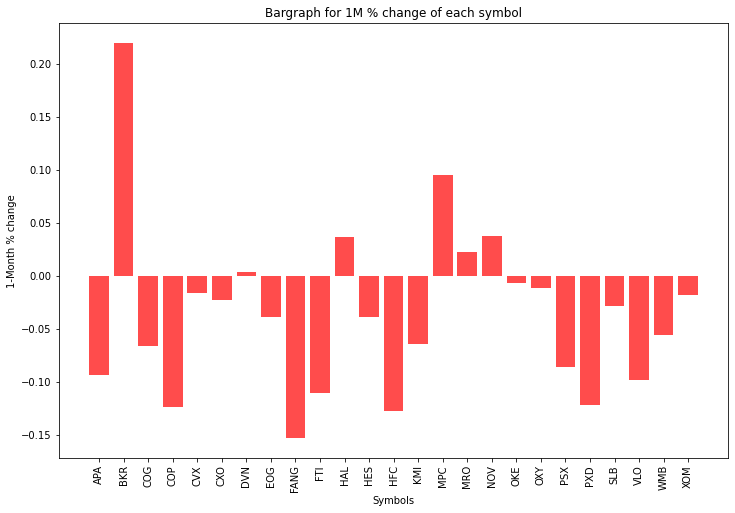

In [ ]:
# 1M %chg
# setting up the figure size
plt.figure(figsize=(12,8))
# plotting a bar graph for 1M % change vs symbol
plt.bar(df['Symbol'], df['1M %Chg'], align='center', alpha=0.7, color='red')
# label for x-axis
plt.xlabel("Symbols") 
# label for y-axis     
plt.ylabel("1-Month % change") 
#title for the bar plot      
plt.title("Bargraph for 1M % change of each symbol")
#naming the ticks on the x-axis  
plt.xticks(range(len(df['Symbol'])),df['Symbol'], rotation=90) 
# showing the plot
plt.show() 

A smaller percent change means smaller standard deviation, which implies less risk on an investment. A larger percent change means larger variance, which implies high risk or volatality on an investment.

From the above plot,

1. CVX,DVN, OKE, OXY and XOM have the lowest 1 month percent change. 

2. Stocks BKR, FANG, HFC, COP, PXD have the highest 1 month %change.

In [ ]:
# selecting the stocks having the 1 month %change lesser than 3%
temp1 = df.loc[(df['1M %Chg'] <= 0.03) & (df['1M %Chg'] >= -0.03)]
temp1


,Symbol,Name,Last,Change,%Chg,Open,High,Low,Volume,Opinion,20D Rel Str,20D His Vol,20D Avg Vol,52W Low,52W High,Wtd Alpha,YTD %Chg,1M %Chg,3M %Chg,52W %Chg,Market Cap,P/E ttm,EPS ttm,Net Income,Beta,Dividend,Div Yield
4,CVX,Chevron Corp,71.15,-0.99,-0.0137,72.50,73.27,70.83,8366918,100% Sell,0.4421,0.3042,10489130,51.60,122.94,-34.1,-0.4096,-0.0159,-0.1866,-0.4066,132860032000,55.49,1.30,2924000000,1.21,5.16,0.0725
5,CXO,Concho Resources Inc,42.39,-1.24,-0.0284,43.61,44.36,42.06,2435936,100% Sell,0.4403,0.6298,4680530,33.13,93.34,-47.6,-0.5159,-0.0228,-0.1788,-0.4085,8321369000,10.12,4.31,-705000000,1.83,0.80,0.0189
6,DVN,Devon Energy Corp,9.77,-0.28,-0.0279,9.95,10.28,9.73,13372664,64% Sell,0.5214,0.6316,10919050,4.70,26.98,-48.1,-0.6238,0.0041,-0.1699,-0.5575,3737025000,41.88,0.24,-355000000,3.28,0.44,0.0450
15,MRO,Marathon Oil Corp,4.13,-0.16,-0.0373,4.26,4.42,4.10,33393281,100% Sell,0.4583,0.5686,30238041,3.02,14.07,-63.6,-0.6959,0.0223,-0.2729,-0.6609,3260383000,0.00,-0.55,480000000,3.25,0.00,0.0000
17,OKE,Oneok Inc,26.89,-1.65,-0.0578,28.42,29.28,26.76,5948438,64% Sell,0.4404,0.4679,4864575,12.16,78.48,-31.5,-0.6446,-0.0063,-0.0763,-0.6200,11949835000,10.89,2.62,1278580000,2.02,3.74,0.1391
18,OXY,Occidental Petroleum Corp,10.01,-0.46,-0.0439,10.34,10.47,9.94,21645305,88% Sell,0.4614,0.5613,22847820,8.52,47.58,-69.4,-0.7571,-0.0118,-0.3521,-0.7473,9310722000,0.00,-2.47,-667000000,1.87,0.04,0.0040
21,SLB,Schlumberger N.V.,15.22,-0.30,-0.0193,15.49,15.83,15.14,10324220,100% Sell,0.4449,0.5175,17189805,11.87,41.14,-49.0,-0.6214,-0.0287,-0.2122,-0.5720,21186698000,18.26,0.85,-10137000000,2.11,0.50,0.0329
24,XOM,Exxon Mobil Corp,32.78,-0.39,-0.0118,33.10,33.66,32.62,33985603,100% Sell,0.4181,0.3602,30044395,30.11,73.03,-53.0,-0.5302,-0.0183,-0.2489,-0.5415,138601504000,552.83,0.06,14340000000,1.29,3.48,0.1062


## Plot 2:Barcharts for Weighted Alpha and Beta

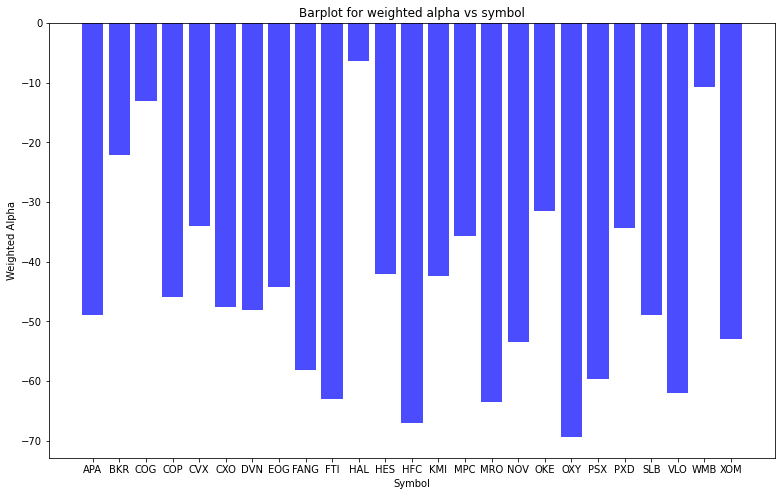

In [ ]:
# setting the figure size
plt.figure(figsize=(13,8))
# plotting a barchart for weighted alpha vs symbol
plt.bar(df['Symbol'], df['Wtd Alpha'], align='center', alpha=0.7, color='blue')
# label for x-axis 
plt.xlabel("Symbol")
# label for y-axis     
plt.ylabel("Weighted Alpha") 
#title for the bar plot    
plt.title("Barplot for weighted alpha vs symbol")
# showing the plot  
plt.show() 

According to our research positive alpha means that stock is outperforming the market and negative alpha means the stock is underperforming the market.Alpha basically shows how well (or badly) a stock has performed in comparison to a benchmark index.
From the above plot,

1. All the stocks are underperforming the market since all of them have negative alpha values. Out of them the ones having lesser negative alpha values are the best, which are COG, HAL and WMB.

2. HFC and OXY are the worst performing stocks based on alpha value, since these two have the highest negative alpha values.



In [ ]:
# selecting the stocks having the alpha greater than or equal to -20
temp2 = df.loc[df['Wtd Alpha'] >= -20]
temp2

,Symbol,Name,Last,Change,%Chg,Open,High,Low,Volume,Opinion,20D Rel Str,20D His Vol,20D Avg Vol,52W Low,52W High,Wtd Alpha,YTD %Chg,1M %Chg,3M %Chg,52W %Chg,Market Cap,P/E ttm,EPS ttm,Net Income,Beta,Dividend,Div Yield
2,COG,Cabot Oil & Gas Corp,16.44,-0.01,-0.0006,16.58,17.05,16.26,5567800,40% Sell,0.3748,0.4053,5415190,13.06,22.67,-13.0,-0.0557,-0.0664,-0.1710,-0.1055,6552655000,34.27,0.48,681070000,0.23,0.40,0.0243
10,HAL,Halliburton Company,12.28,-0.29,-0.0231,12.50,12.79,12.27,10871287,56% Sell,0.4562,0.5709,14581375,4.25,25.47,-6.3,-0.4982,0.0363,-0.1714,-0.4039,10855606000,15.91,0.79,-1131000000,2.71,0.18,0.0147
23,WMB,Williams Companies,18.26,-0.85,-0.0445,19.13,19.47,18.26,9441853,40% Sell,0.4003,0.3479,8526055,8.41,24.17,-10.7,-0.2302,-0.0554,-0.1230,-0.1790,22160082000,18.74,1.01,850000000,1.75,1.60,0.0876


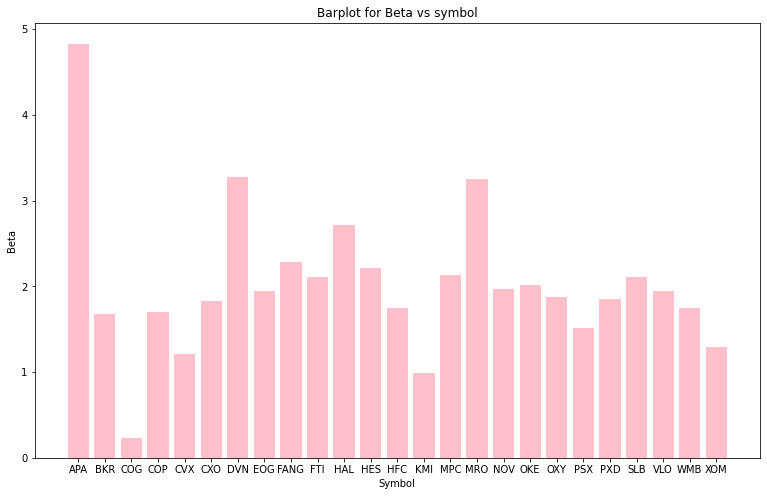

In [ ]:
# setting the figure size
plt.figure(figsize=(13,8))
# plotting a barchart for beta vs symbol
plt.bar(df['Symbol'], df['Beta'], align='center', alpha=1, color='pink')
# label for x-axis 
plt.xlabel("Symbol")
# label for y-axis     
plt.ylabel("Beta") 
#title for the bar plot    
plt.title("Barplot for Beta vs symbol")
# showing the plot  
plt.show() 

Beta is an indication of the volatility of a stock, a fund, or a stock portfolio in comparison with the market as a whole.
According to our research,the baseline number for beta is one, which indicates that the security's price moves exactly as the market moves. A beta of less than 1 means that the security is less volatile than the market, while a beta greater than 1 indicates that its price is more volatile than the market. A high beta may be preferred by an investor in growth stocks but shunned by investors who seek steady returns and lower risk.

From the above plot, 

1. COG, KMI are steady and at low risk level.

2. APA, DVN and MRO are more volatile and involve high risks.


In [ ]:
# selecting the stocks having the beta lesser than or equal to 1
temp3 = df.loc[df['Beta'] <= 1]
temp3

,Symbol,Name,Last,Change,%Chg,Open,High,Low,Volume,Opinion,20D Rel Str,20D His Vol,20D Avg Vol,52W Low,52W High,Wtd Alpha,YTD %Chg,1M %Chg,3M %Chg,52W %Chg,Market Cap,P/E ttm,EPS ttm,Net Income,Beta,Dividend,Div Yield
2,COG,Cabot Oil & Gas Corp,16.44,-0.01,-0.0006,16.58,17.05,16.26,5567800,40% Sell,0.3748,0.4053,5415190,13.06,22.67,-13.0,-0.0557,-0.0664,-0.1710,-0.1055,6552655000,34.27,0.48,681070000,0.23,0.40,0.0243
13,KMI,Kinder Morgan,11.48,-0.42,-0.0353,11.91,12.08,11.45,14255440,100% Sell,0.3595,0.2800,15082640,9.42,22.58,-42.4,-0.4577,-0.0644,-0.1972,-0.4320,25988352000,13.52,0.88,2190000000,0.99,1.05,0.0915


## Plot 3: Histogram for Dividend

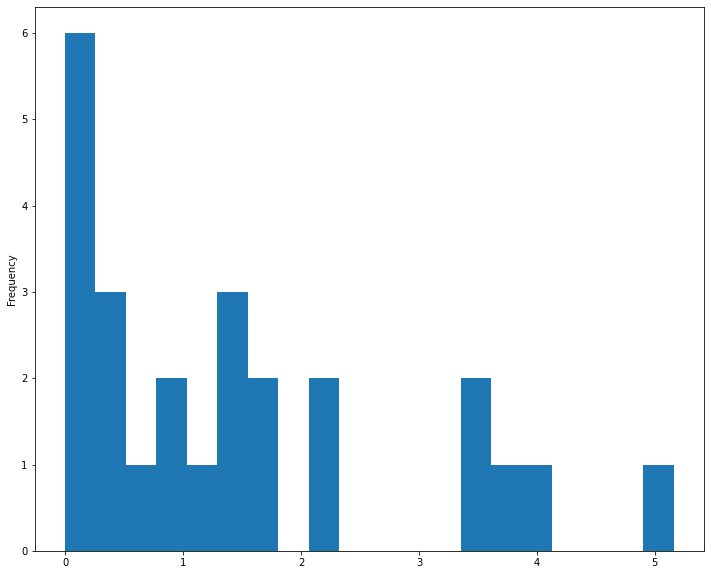

In [ ]:
# making a histogram plot for dividend
df['Dividend'].plot.hist(bins=20)
# setting the figure size in inches   
plt.gcf().set_size_inches((12, 10))
#showing the plot
plt.show()

As dividends are a form of cash flow to the investor, they are an important reflection of a company's value.

Our team, as an investor, prefer to invest in equities that produce a high dividend yield.

From the above plot,

1. About seven stocks have a dividend greater than 2, out of which only CVX has a dividend greater than 4. So its our best stock according to the dividend.

2. About 11 stocks have a dividend lesser than 1, which is too less while considering to invest in a stock.

In [ ]:
# extracting the companies that have dividend equal or above 2
temp4 = df.loc[df['Dividend'] >= 2]
temp4

,Symbol,Name,Last,Change,%Chg,Open,High,Low,Volume,Opinion,20D Rel Str,20D His Vol,20D Avg Vol,52W Low,52W High,Wtd Alpha,YTD %Chg,1M %Chg,3M %Chg,52W %Chg,Market Cap,P/E ttm,EPS ttm,Net Income,Beta,Dividend,Div Yield
4,CVX,Chevron Corp,71.15,-0.99,-0.0137,72.50,73.27,70.83,8366918,100% Sell,0.4421,0.3042,10489130,51.60,122.94,-34.1,-0.4096,-0.0159,-0.1866,-0.4066,132860032000,55.49,1.30,2924000000,1.21,5.16,0.0725
14,MPC,Marathon Petroleum Corp,31.58,-0.25,-0.0079,31.70,32.47,31.29,7181674,64% Sell,0.5317,0.4607,6764725,15.26,66.82,-35.7,-0.4759,0.0954,-0.1161,-0.5087,20548948000,0.00,1.70,2637000000,2.13,2.32,0.0735
17,OKE,Oneok Inc,26.89,-1.65,-0.0578,28.42,29.28,26.76,5948438,64% Sell,0.4404,0.4679,4864575,12.16,78.48,-31.5,-0.6446,-0.0063,-0.0763,-0.6200,11949835000,10.89,2.62,1278580000,2.02,3.74,0.1391
19,PSX,Phillips 66,46.68,-1.51,-0.0313,48.11,48.89,46.19,3617112,100% Sell,0.3953,0.4391,3504365,40.04,119.92,-59.7,-0.5810,-0.0858,-0.2344,-0.6058,20389824000,26.62,1.81,3076000000,1.51,3.60,0.0771
20,PXD,Pioneer Natural Resources Company,77.34,-2.24,-0.0281,79.93,81.37,77.10,2205206,100% Sell,0.3864,0.5070,2556410,48.62,159.01,-34.4,-0.4891,-0.1214,-0.2444,-0.4210,12705105000,23.68,5.18,756000000,1.85,2.20,0.0284
22,VLO,Valero Energy Corp,38.17,-1.36,-0.0344,39.45,39.90,37.97,4378749,100% Sell,0.3954,0.4615,5011310,31.00,101.87,-62.0,-0.5924,-0.0983,-0.2585,-0.6196,15564084000,658.83,0.06,2422000000,1.94,3.92,0.1027
24,XOM,Exxon Mobil Corp,32.78,-0.39,-0.0118,33.10,33.66,32.62,33985603,100% Sell,0.4181,0.3602,30044395,30.11,73.03,-53.0,-0.5302,-0.0183,-0.2489,-0.5415,138601504000,552.83,0.06,14340000000,1.29,3.48,0.1062


## Plot 4: Plot for P/E ratio

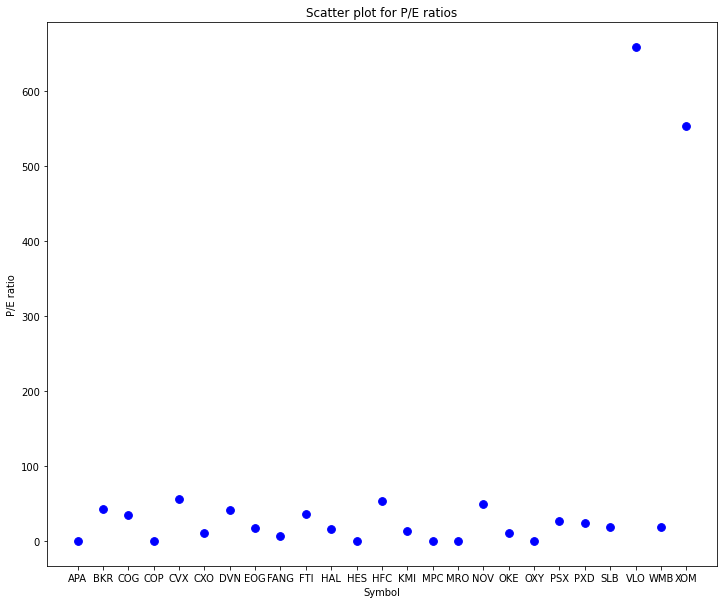

In [ ]:
# plotting a scatter plot for P/E ttm vs symbol
df.plot.scatter(x='Symbol', y='P/E ttm', color='blue', s=60)
# label for x-axis
plt.xlabel("Symbol") 
# label for y-axis     
plt.ylabel("P/E ratio")
#title for scatter plot       
plt.title("Scatter plot for P/E ratios") 
# setting the figure size in inches   
plt.gcf().set_size_inches((12, 10)) 
# showing the plot
plt.show() 


A high P/E ratio means that an investor is spending more money on a stock than compared to its earnings and a low P/E ratio means than an investor is getting more earnings than what he is spending on a stock. So a stock with lower P/E is always better.

Also high P/E ratio can indicate that a stock is being overvalued.

From the above plot,

1. All the stocks except 2 of them have P/E ratio less than 100 which is good.

2. Stocks APA, COP, HES, MPC, MRO and OXY have P/E ratio lesser than 1.




In [ ]:
# According to our research, the average P/E for the S&P 500 has historically ranged from 13 to 15 
# so, we decided to extract the companies that have P/E ratio equal or below 15
temp5 = df.loc[df['P/E ttm'] <= 15]
temp5

,Symbol,Name,Last,Change,%Chg,Open,High,Low,Volume,Opinion,20D Rel Str,20D His Vol,20D Avg Vol,52W Low,52W High,Wtd Alpha,YTD %Chg,1M %Chg,3M %Chg,52W %Chg,Market Cap,P/E ttm,EPS ttm,Net Income,Beta,Dividend,Div Yield
0,APA,Apache Corp,8.53,-0.44,-0.0491,8.87,9.09,8.50,12204400,100% Sell,0.4010,0.6938,13348685,3.80,33.77,-49.0,-0.6665,-0.0939,-0.4529,-0.6387,3221613000,0.00,-1.08,-3553000000,4.83,0.10,0.0117
3,COP,Conocophillips,29.19,-0.93,-0.0309,30.13,30.65,28.78,10484496,100% Sell,0.3963,0.5354,13277440,20.84,67.13,-45.9,-0.5511,-0.1234,-0.2329,-0.4935,31313338000,0.00,-0.02,7189000000,1.70,1.72,0.0589
5,CXO,Concho Resources Inc,42.39,-1.24,-0.0284,43.61,44.36,42.06,2435936,100% Sell,0.4403,0.6298,4680530,33.13,93.34,-47.6,-0.5159,-0.0228,-0.1788,-0.4085,8321369000,10.12,4.31,-705000000,1.83,0.80,0.0189
8,FANG,Diamondback Energy,24.74,-1.46,-0.0557,26.08,26.35,24.57,4655800,100% Sell,0.3672,0.5919,3522440,14.55,96.92,-58.2,-0.7336,-0.1530,-0.3926,-0.6795,3904566000,6.31,5.00,240000000,2.28,1.50,0.0606
11,HES,Hess Corp,36.49,-0.51,-0.0138,36.86,37.76,36.44,1676115,100% Sell,0.4064,0.4157,1983950,26.06,74.11,-42.1,-0.4538,-0.0390,-0.3165,-0.4685,11207685000,0.00,-2.96,-408000000,2.21,1.00,0.0274
13,KMI,Kinder Morgan,11.48,-0.42,-0.0353,11.91,12.08,11.45,14255440,100% Sell,0.3595,0.2800,15082640,9.42,22.58,-42.4,-0.4577,-0.0644,-0.1972,-0.4320,25988352000,13.52,0.88,2190000000,0.99,1.05,0.0915
14,MPC,Marathon Petroleum Corp,31.58,-0.25,-0.0079,31.70,32.47,31.29,7181674,64% Sell,0.5317,0.4607,6764725,15.26,66.82,-35.7,-0.4759,0.0954,-0.1161,-0.5087,20548948000,0.00,1.70,2637000000,2.13,2.32,0.0735
15,MRO,Marathon Oil Corp,4.13,-0.16,-0.0373,4.26,4.42,4.10,33393281,100% Sell,0.4583,0.5686,30238041,3.02,14.07,-63.6,-0.6959,0.0223,-0.2729,-0.6609,3260383000,0.00,-0.55,480000000,3.25,0.00,0.0000
17,OKE,Oneok Inc,26.89,-1.65,-0.0578,28.42,29.28,26.76,5948438,64% Sell,0.4404,0.4679,4864575,12.16,78.48,-31.5,-0.6446,-0.0063,-0.0763,-0.6200,11949835000,10.89,2.62,1278580000,2.02,3.74,0.1391
18,OXY,Occidental Petroleum Corp,10.01,-0.46,-0.0439,10.34,10.47,9.94,21645305,88% Sell,0.4614,0.5613,22847820,8.52,47.58,-69.4,-0.7571,-0.0118,-0.3521,-0.7473,9310722000,0.00,-2.47,-667000000,1.87,0.04,0.0040


## Plot 5: Plot for EPS **ratio**

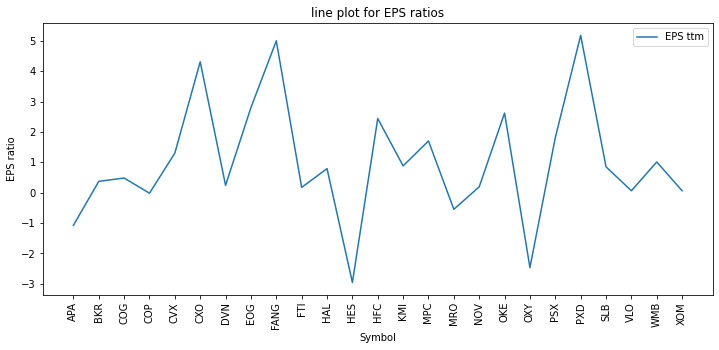

In [ ]:
# making a plot for EPS ratio
df.plot(x='Symbol',y='EPS ttm')
# label for x-axis
plt.xlabel("Symbol")  
# label for y-axis    
plt.ylabel("EPS ratio")
#title for line plot      
plt.title("line plot for EPS ratios")
# setting the figure size     
plt.gcf().set_size_inches((12, 5))
# naming the ticks on x-axis 
plt.xticks(range(len(df['Symbol'])), df['Symbol'], rotation=90)
# showing the plot 
plt.show() 

Earnings per share is a company's net profit divided by the number of common shares it has outstanding.

EPS indicates how much money a company makes for each share of its stock.

From the above plot,

1. Stocks HES and OXY have the lowest EPS of all the 25 stocks

2. Stocks FANG and PXD have the highest EPS of all the 25 stocks. So these are our best stocks according to Earnings per Share (EPS).

In [ ]:

# we decided to extract the companies that have EPS equal or above 1
temp6 = df.loc[df['EPS ttm'] >= 1]
temp6


,Symbol,Name,Last,Change,%Chg,Open,High,Low,Volume,Opinion,20D Rel Str,20D His Vol,20D Avg Vol,52W Low,52W High,Wtd Alpha,YTD %Chg,1M %Chg,3M %Chg,52W %Chg,Market Cap,P/E ttm,EPS ttm,Net Income,Beta,Dividend,Div Yield
4,CVX,Chevron Corp,71.15,-0.99,-0.0137,72.50,73.27,70.83,8366918,100% Sell,0.4421,0.3042,10489130,51.60,122.94,-34.1,-0.4096,-0.0159,-0.1866,-0.4066,132860032000,55.49,1.30,2924000000,1.21,5.16,0.0725
5,CXO,Concho Resources Inc,42.39,-1.24,-0.0284,43.61,44.36,42.06,2435936,100% Sell,0.4403,0.6298,4680530,33.13,93.34,-47.6,-0.5159,-0.0228,-0.1788,-0.4085,8321369000,10.12,4.31,-705000000,1.83,0.80,0.0189
7,EOG,Eog Resources,34.58,-1.02,-0.0287,36.30,37.13,34.04,8823508,100% Sell,0.4236,0.4977,6341790,27.00,89.54,-44.2,-0.5872,-0.0392,-0.3205,-0.5158,20133998000,16.95,2.80,2734910000,1.95,1.50,0.0434
8,FANG,Diamondback Energy,24.74,-1.46,-0.0557,26.08,26.35,24.57,4655800,100% Sell,0.3672,0.5919,3522440,14.55,96.92,-58.2,-0.7336,-0.1530,-0.3926,-0.6795,3904566000,6.31,5.00,240000000,2.28,1.50,0.0606
12,HFC,Hollyfrontier Corp,17.57,-1.10,-0.0589,18.52,18.97,17.42,4068116,100% Sell,0.3869,0.5838,2643715,16.81,55.01,-67.0,-0.6535,-0.1272,-0.2864,-0.6711,2846603000,53.34,2.44,772390000,1.75,1.40,0.0797
14,MPC,Marathon Petroleum Corp,31.58,-0.25,-0.0079,31.70,32.47,31.29,7181674,64% Sell,0.5317,0.4607,6764725,15.26,66.82,-35.7,-0.4759,0.0954,-0.1161,-0.5087,20548948000,0.00,1.70,2637000000,2.13,2.32,0.0735
17,OKE,Oneok Inc,26.89,-1.65,-0.0578,28.42,29.28,26.76,5948438,64% Sell,0.4404,0.4679,4864575,12.16,78.48,-31.5,-0.6446,-0.0063,-0.0763,-0.6200,11949835000,10.89,2.62,1278580000,2.02,3.74,0.1391
19,PSX,Phillips 66,46.68,-1.51,-0.0313,48.11,48.89,46.19,3617112,100% Sell,0.3953,0.4391,3504365,40.04,119.92,-59.7,-0.5810,-0.0858,-0.2344,-0.6058,20389824000,26.62,1.81,3076000000,1.51,3.60,0.0771
20,PXD,Pioneer Natural Resources Company,77.34,-2.24,-0.0281,79.93,81.37,77.10,2205206,100% Sell,0.3864,0.5070,2556410,48.62,159.01,-34.4,-0.4891,-0.1214,-0.2444,-0.4210,12705105000,23.68,5.18,756000000,1.85,2.20,0.0284
23,WMB,Williams Companies,18.26,-0.85,-0.0445,19.13,19.47,18.26,9441853,40% Sell,0.4003,0.3479,8526055,8.41,24.17,-10.7,-0.2302,-0.0554,-0.1230,-0.1790,22160082000,18.74,1.01,850000000,1.75,1.60,0.0876


In [ ]:
# Then we have put the above six dataframes(which contain our filtered best stocks according to various criteria as discussed above) together
frames = [temp1, temp2, temp3, temp4, temp5, temp6]
result1 = pd.concat(frames)
result1

,Symbol,Name,Last,Change,%Chg,Open,High,Low,Volume,Opinion,20D Rel Str,20D His Vol,20D Avg Vol,52W Low,52W High,Wtd Alpha,YTD %Chg,1M %Chg,3M %Chg,52W %Chg,Market Cap,P/E ttm,EPS ttm,Net Income,Beta,Dividend,Div Yield
4,CVX,Chevron Corp,71.15,-0.99,-0.0137,72.50,73.27,70.83,8366918,100% Sell,0.4421,0.3042,10489130,51.60,122.94,-34.1,-0.4096,-0.0159,-0.1866,-0.4066,132860032000,55.49,1.30,2924000000,1.21,5.16,0.0725
5,CXO,Concho Resources Inc,42.39,-1.24,-0.0284,43.61,44.36,42.06,2435936,100% Sell,0.4403,0.6298,4680530,33.13,93.34,-47.6,-0.5159,-0.0228,-0.1788,-0.4085,8321369000,10.12,4.31,-705000000,1.83,0.80,0.0189
6,DVN,Devon Energy Corp,9.77,-0.28,-0.0279,9.95,10.28,9.73,13372664,64% Sell,0.5214,0.6316,10919050,4.70,26.98,-48.1,-0.6238,0.0041,-0.1699,-0.5575,3737025000,41.88,0.24,-355000000,3.28,0.44,0.0450
15,MRO,Marathon Oil Corp,4.13,-0.16,-0.0373,4.26,4.42,4.10,33393281,100% Sell,0.4583,0.5686,30238041,3.02,14.07,-63.6,-0.6959,0.0223,-0.2729,-0.6609,3260383000,0.00,-0.55,480000000,3.25,0.00,0.0000
17,OKE,Oneok Inc,26.89,-1.65,-0.0578,28.42,29.28,26.76,5948438,64% Sell,0.4404,0.4679,4864575,12.16,78.48,-31.5,-0.6446,-0.0063,-0.0763,-0.6200,11949835000,10.89,2.62,1278580000,2.02,3.74,0.1391
18,OXY,Occidental Petroleum Corp,10.01,-0.46,-0.0439,10.34,10.47,9.94,21645305,88% Sell,0.4614,0.5613,22847820,8.52,47.58,-69.4,-0.7571,-0.0118,-0.3521,-0.7473,9310722000,0.00,-2.47,-667000000,1.87,0.04,0.0040
21,SLB,Schlumberger N.V.,15.22,-0.30,-0.0193,15.49,15.83,15.14,10324220,100% Sell,0.4449,0.5175,17189805,11.87,41.14,-49.0,-0.6214,-0.0287,-0.2122,-0.5720,21186698000,18.26,0.85,-10137000000,2.11,0.50,0.0329
24,XOM,Exxon Mobil Corp,32.78,-0.39,-0.0118,33.10,33.66,32.62,33985603,100% Sell,0.4181,0.3602,30044395,30.11,73.03,-53.0,-0.5302,-0.0183,-0.2489,-0.5415,138601504000,552.83,0.06,14340000000,1.29,3.48,0.1062
2,COG,Cabot Oil & Gas Corp,16.44,-0.01,-0.0006,16.58,17.05,16.26,5567800,40% Sell,0.3748,0.4053,5415190,13.06,22.67,-13.0,-0.0557,-0.0664,-0.1710,-0.1055,6552655000,34.27,0.48,681070000,0.23,0.40,0.0243
10,HAL,Halliburton Company,12.28,-0.29,-0.0231,12.50,12.79,12.27,10871287,56% Sell,0.4562,0.5709,14581375,4.25,25.47,-6.3,-0.4982,0.0363,-0.1714,-0.4039,10855606000,15.91,0.79,-1131000000,2.71,0.18,0.0147


In [ ]:
# by sorting on the Symbol, we are able to pick up the stocks that satisfy more than one criterion
result2 = result1.sort_values(by = 'Symbol') 
result2

,Symbol,Name,Last,Change,%Chg,Open,High,Low,Volume,Opinion,20D Rel Str,20D His Vol,20D Avg Vol,52W Low,52W High,Wtd Alpha,YTD %Chg,1M %Chg,3M %Chg,52W %Chg,Market Cap,P/E ttm,EPS ttm,Net Income,Beta,Dividend,Div Yield
0,APA,Apache Corp,8.53,-0.44,-0.0491,8.87,9.09,8.50,12204400,100% Sell,0.4010,0.6938,13348685,3.80,33.77,-49.0,-0.6665,-0.0939,-0.4529,-0.6387,3221613000,0.00,-1.08,-3553000000,4.83,0.10,0.0117
2,COG,Cabot Oil & Gas Corp,16.44,-0.01,-0.0006,16.58,17.05,16.26,5567800,40% Sell,0.3748,0.4053,5415190,13.06,22.67,-13.0,-0.0557,-0.0664,-0.1710,-0.1055,6552655000,34.27,0.48,681070000,0.23,0.40,0.0243
2,COG,Cabot Oil & Gas Corp,16.44,-0.01,-0.0006,16.58,17.05,16.26,5567800,40% Sell,0.3748,0.4053,5415190,13.06,22.67,-13.0,-0.0557,-0.0664,-0.1710,-0.1055,6552655000,34.27,0.48,681070000,0.23,0.40,0.0243
3,COP,Conocophillips,29.19,-0.93,-0.0309,30.13,30.65,28.78,10484496,100% Sell,0.3963,0.5354,13277440,20.84,67.13,-45.9,-0.5511,-0.1234,-0.2329,-0.4935,31313338000,0.00,-0.02,7189000000,1.70,1.72,0.0589
4,CVX,Chevron Corp,71.15,-0.99,-0.0137,72.50,73.27,70.83,8366918,100% Sell,0.4421,0.3042,10489130,51.60,122.94,-34.1,-0.4096,-0.0159,-0.1866,-0.4066,132860032000,55.49,1.30,2924000000,1.21,5.16,0.0725
4,CVX,Chevron Corp,71.15,-0.99,-0.0137,72.50,73.27,70.83,8366918,100% Sell,0.4421,0.3042,10489130,51.60,122.94,-34.1,-0.4096,-0.0159,-0.1866,-0.4066,132860032000,55.49,1.30,2924000000,1.21,5.16,0.0725
4,CVX,Chevron Corp,71.15,-0.99,-0.0137,72.50,73.27,70.83,8366918,100% Sell,0.4421,0.3042,10489130,51.60,122.94,-34.1,-0.4096,-0.0159,-0.1866,-0.4066,132860032000,55.49,1.30,2924000000,1.21,5.16,0.0725
5,CXO,Concho Resources Inc,42.39,-1.24,-0.0284,43.61,44.36,42.06,2435936,100% Sell,0.4403,0.6298,4680530,33.13,93.34,-47.6,-0.5159,-0.0228,-0.1788,-0.4085,8321369000,10.12,4.31,-705000000,1.83,0.80,0.0189
5,CXO,Concho Resources Inc,42.39,-1.24,-0.0284,43.61,44.36,42.06,2435936,100% Sell,0.4403,0.6298,4680530,33.13,93.34,-47.6,-0.5159,-0.0228,-0.1788,-0.4085,8321369000,10.12,4.31,-705000000,1.83,0.80,0.0189
5,CXO,Concho Resources Inc,42.39,-1.24,-0.0284,43.61,44.36,42.06,2435936,100% Sell,0.4403,0.6298,4680530,33.13,93.34,-47.6,-0.5159,-0.0228,-0.1788,-0.4085,8321369000,10.12,4.31,-705000000,1.83,0.80,0.0189


## Chosen Stocks

*   Stocks that satisfy one or two criteria: COP COG	CXO FANG KMI VLO WMB XOM
*   Stocks that satisfy more than or equal to three criteria: CVX, MPC, OKE, PSX, PXD

**Final  Stocks: CVX, KMI, FANG, PSX, PXD, MPC, OKE, COP, VLO, WMB**



# Download Stock Market Data
Using Yahoo we downloaded the historical market data from 01-01-19 to 01-01-20 for our ten chosen stocks. Extracted the daily price of stocks in the date range.

In [ ]:
# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

     |████████████████████████████████| 153kB 6.5MB/s 
     |████████████████████████████████| 143kB 15.9MB/s 
     |████████████████████████████████| 71kB 5.4MB/s 
     |████████████████████████████████| 81kB 6.7MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp36-none-any.whl size=13485 sha256=eb75c831d71f80a58dcf87a9eae58bea5c85d680ba57721b64769b66380779da
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created wheel for parse: filename=parse-1.18.0-cp36-none-any.whl size=24133 sha256=055ebd46e70835b0674b65cb943c25c19e9ccd0a6f5808a9002d44151d3c04bc
  Stored in directory: /root/.cache/pip/wheels/2a/53/09/869ca5781ede342254ffac09ca99461b008c3e5f8dd079b0c0
Successfully built fake-useragent parse
ERROR: requests 2.23.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have fo

/usr/local/lib/python3.6/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
# Assign the ticker list
tickers_list = ['CVX','KMI','FANG','PSX','PXD','MPC','OKE','COP','VLO','WMB']
# Pull historical daily price data for each stock in ticker list from 01-01-19 to 01-01-2020
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2019',end_date='01/01/2020',interval='1d') for ticker in tickers_list}

In [ ]:
# Overview
dow_prices

{'COP':                  open       high        low  ...   adjclose   volume  ticker
 2019-01-02  60.689999  63.849998  60.430000  ...  59.600922  5735400     COP
 2019-01-03  63.540001  63.709999  61.660000  ...  58.472481  4727300     COP
 2019-01-04  63.080002  63.910000  62.660000  ...  59.948864  7700100     COP
 2019-01-07  63.910000  64.269997  62.689999  ...  59.685562  6272200     COP
 2019-01-08  64.209999  64.580002  63.459999  ...  60.484879  5774900     COP
 ...               ...        ...        ...  ...        ...      ...     ...
 2019-12-24  64.760002  65.510002  64.610001  ...  62.173134  3188400     COP
 2019-12-26  65.089996  65.739998  64.849998  ...  62.490391  4835200     COP
 2019-12-27  65.199997  65.629997  64.610001  ...  62.471169  5414300     COP
 2019-12-30  65.070000  65.250000  64.529999  ...  62.115456  3665200     COP
 2019-12-31  64.150002  65.169998  63.900002  ...  62.519238  3639800     COP
 
 [252 rows x 7 columns],
 'CVX':                   open

In [ ]:
# Extract just the data we need (adjclose)
# Adjclose price for the CVX (one sample)
prep_data = pd.DataFrame(dow_prices['CVX']['adjclose']).rename(columns = {"adjclose":"CVX"})

# Combine all the tickers to get the rest of the samples
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data

,CVX,KMI,FANG,PSX,PXD,MPC,OKE,COP,VLO,WMB
2019-01-02,100.664474,14.043733,91.230690,80.723923,130.504013,54.281933,46.321224,59.600922,68.058044,19.802347
2019-01-03,98.736496,13.963736,92.131302,79.606323,130.921844,53.490097,46.210548,58.472481,66.833084,19.970163
2019-01-04,100.782707,14.434823,95.743347,83.215622,135.352966,56.111351,48.228222,59.948864,69.364090,20.800415
2019-01-07,102.092270,14.745919,98.330223,83.792747,138.297348,56.666546,49.071045,59.685562,69.436157,21.330360
2019-01-08,101.646660,15.234780,100.553024,83.719460,138.180725,57.221748,50.118191,60.484879,69.679337,21.966297
...,...,...,...,...,...,...,...,...,...,...
2019-12-24,113.886909,19.706505,87.043617,107.430840,148.340134,57.638554,67.803513,62.173134,89.327538,22.349529
2019-12-26,114.132973,19.771791,88.134315,106.348946,148.613754,57.165874,68.278854,62.490391,88.688820,22.321404
2019-12-27,113.849068,19.659872,87.613091,104.963356,148.320587,57.080788,67.902168,62.471169,87.542870,22.115158
2019-12-30,113.423195,19.613243,87.902664,104.745079,147.859985,56.409584,67.642075,62.115456,87.242294,21.749542


In [ ]:
# See shape
prep_data.shape

(252, 10)

In [ ]:
# Create return features for each ticker, use pct_change as the return
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()
# Drop the na records
return_data.dropna(inplace=True)
return_data

,CVX,KMI,FANG,PSX,PXD,MPC,OKE,COP,VLO,WMB
2019-01-03,-0.019153,-0.005696,0.009872,-0.013845,0.003202,-0.014587,-0.002389,-0.018933,-0.017999,0.008475
2019-01-04,0.020724,0.033736,0.039205,0.045339,0.033846,0.049004,0.043663,0.025249,0.037871,0.041575
2019-01-07,0.012994,0.021552,0.027019,0.006935,0.021753,0.009895,0.017476,-0.004392,0.001039,0.025478
2019-01-08,-0.004365,0.033152,0.022605,-0.000875,-0.000843,0.009798,0.021339,0.013392,0.003502,0.029814
2019-01-09,0.013421,0.007001,0.017532,0.006565,0.025387,0.021473,0.014608,0.033116,-0.000905,0.011259
...,...,...,...,...,...,...,...,...,...,...
2019-12-24,0.000083,-0.003302,0.012917,0.004704,0.005764,0.005110,-0.005132,0.001084,-0.001470,-0.004177
2019-12-26,0.002161,0.003313,0.012530,-0.010071,0.001845,-0.008201,0.007011,0.005103,-0.007150,-0.001258
2019-12-27,-0.002487,-0.005661,-0.005914,-0.013029,-0.001973,-0.001488,-0.005517,-0.000308,-0.012921,-0.009240
2019-12-30,-0.003741,-0.002372,0.003305,-0.002080,-0.003105,-0.011759,-0.003830,-0.005694,-0.003433,-0.016532


In [ ]:
# View Shape
return_data.shape

(251, 10)

## Visualize the Time Series

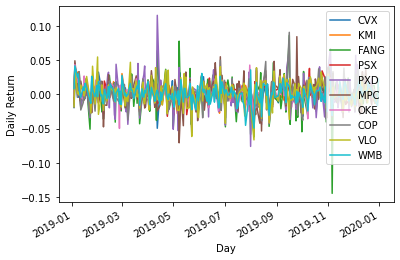

In [ ]:
# Plot daily return on one graph
return_data.plot()
plt.xlabel('Day')
plt.ylabel('Daily Return')
plt.show()

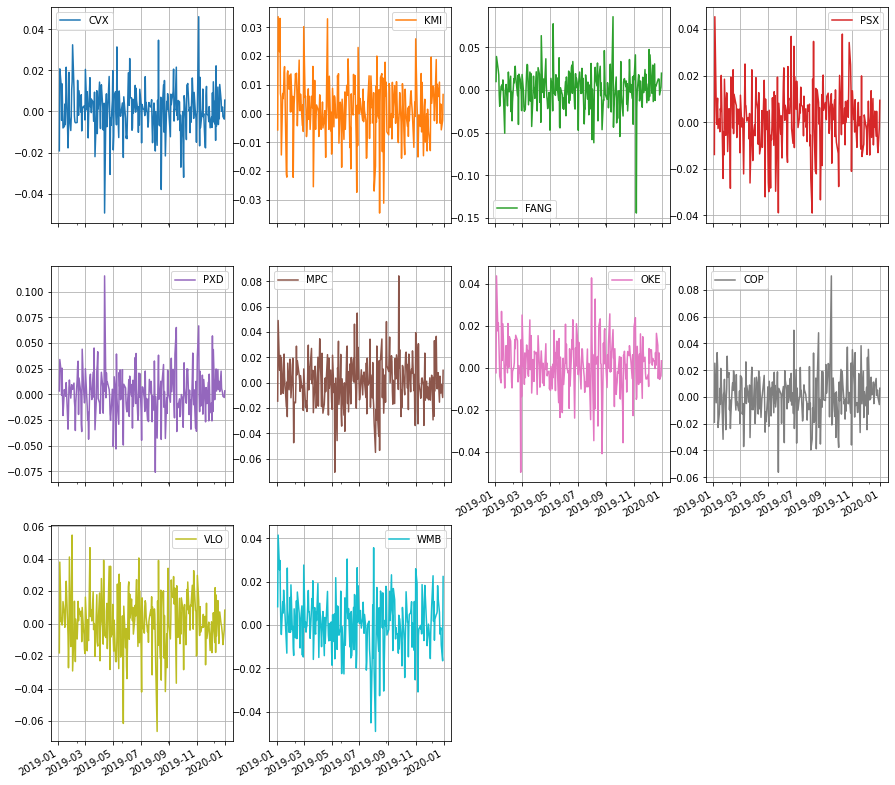

In [ ]:
# Plot daily return of each stock separately
return_data.plot(subplots=True,
        grid=True, 
        layout=(3,4),
         figsize=(15,15))
plt.show()

# Modeling Section

## Modeling Setup

In [ ]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
# import datetime # handling dates
# import time # handling times
# from dateutil.relativedelta import relativedelta # time difference
# from matplotlib.pyplot import figure 

In [ ]:
# Mount our drive since we are linking to a spreadsheet on our drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Install pyomo
!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' # THIS IS NEW! We are using the IPOPT Solver.
except:
    pass

## Prepare Data

In [ ]:
# Get average return of each stock
Avg_Return = pd.DataFrame(np.mean(return_data) ,columns=["Avg_Return"])
print(Avg_Return)
# Get standard deviation average return of each stock
Std_Dev_Return = pd.DataFrame(np.std(return_data) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

      Avg_Return
CVX     0.000564
KMI     0.001414
FANG    0.000221
PSX     0.001163
PXD     0.000764
MPC     0.000397
OKE     0.001598
COP     0.000344
VLO     0.001180
WMB     0.000546
      Std_Dev_Return
CVX         0.011548
KMI         0.010574
FANG        0.023965
PSX         0.013236
PXD         0.022568
MPC         0.020273
OKE         0.012240
COP         0.017586
VLO         0.017698
WMB         0.012917


In [ ]:
# Covariance of return
Covariance_matrix = return_data.cov()
Covariance_matrix

,CVX,KMI,FANG,PSX,PXD,MPC,OKE,COP,VLO,WMB
CVX,0.000134,0.000061,0.000141,0.000081,0.000121,0.000108,0.000068,0.000121,0.000102,0.000071
KMI,0.000061,0.000112,0.000112,0.000070,0.000100,0.000083,0.000083,0.000084,0.000080,0.000089
FANG,0.000141,0.000112,0.000577,0.000133,0.000414,0.000179,0.000152,0.000264,0.000167,0.000146
PSX,0.000081,0.000070,0.000133,0.000176,0.000127,0.000178,0.000077,0.000124,0.000160,0.000080
PXD,0.000121,0.000100,0.000414,0.000127,0.000511,0.000184,0.000133,0.000245,0.000168,0.000128
MPC,0.000108,0.000083,0.000179,0.000178,0.000184,0.000413,0.000111,0.000167,0.000262,0.000126
OKE,0.000068,0.000083,0.000152,0.000077,0.000133,0.000111,0.000150,0.000108,0.000106,0.000109
COP,0.000121,0.000084,0.000264,0.000124,0.000245,0.000167,0.000108,0.000311,0.000148,0.000109
VLO,0.000102,0.000080,0.000167,0.000160,0.000168,0.000262,0.000106,0.000148,0.000314,0.000106
WMB,0.000071,0.000089,0.000146,0.000080,0.000128,0.000126,0.000109,0.000109,0.000106,0.000168


In [ ]:
# Correlation of return
Corr_matrix = return_data.corr()
Corr_matrix

,CVX,KMI,FANG,PSX,PXD,MPC,OKE,COP,VLO,WMB
CVX,1.000000,0.496342,0.506982,0.530943,0.460918,0.458556,0.478639,0.593583,0.497542,0.474241
KMI,0.496342,1.000000,0.439923,0.496636,0.417618,0.385526,0.639914,0.448624,0.424356,0.646150
FANG,0.506982,0.439923,1.000000,0.418936,0.761707,0.366836,0.515881,0.622778,0.391497,0.470678
PSX,0.530943,0.496636,0.418936,1.000000,0.422028,0.660866,0.472689,0.530143,0.679184,0.464178
PXD,0.460918,0.417618,0.761707,0.422028,1.000000,0.400052,0.480468,0.614932,0.417882,0.436025
MPC,0.458556,0.385526,0.366836,0.660866,0.400052,1.000000,0.447213,0.465636,0.728444,0.480167
OKE,0.478639,0.639914,0.515881,0.472689,0.480468,0.447213,1.000000,0.498764,0.486003,0.687139
COP,0.593583,0.448624,0.622778,0.530143,0.614932,0.465636,0.498764,1.000000,0.472404,0.475789
VLO,0.497542,0.424356,0.391497,0.679184,0.417882,0.728444,0.486003,0.472404,1.000000,0.463925
WMB,0.474241,0.646150,0.470678,0.464178,0.436025,0.480167,0.687139,0.475789,0.463925,1.000000


## Nonlinear Optimization Model

In [ ]:
# Create covariance table on stock return dataframe
return_data_cov = return_data.cov()
print('Covariance Matrix:')
print(return_data_cov)
print('\n') # return/blank line

# Create the average of each stock
# Also the objective function coefficients
return_data_return = return_data.mean()
print('Average Return:')
print(return_data_return)

Covariance Matrix:
           CVX       KMI      FANG  ...       COP       VLO       WMB
CVX   0.000134  0.000061  0.000141  ...  0.000121  0.000102  0.000071
KMI   0.000061  0.000112  0.000112  ...  0.000084  0.000080  0.000089
FANG  0.000141  0.000112  0.000577  ...  0.000264  0.000167  0.000146
PSX   0.000081  0.000070  0.000133  ...  0.000124  0.000160  0.000080
PXD   0.000121  0.000100  0.000414  ...  0.000245  0.000168  0.000128
MPC   0.000108  0.000083  0.000179  ...  0.000167  0.000262  0.000126
OKE   0.000068  0.000083  0.000152  ...  0.000108  0.000106  0.000109
COP   0.000121  0.000084  0.000264  ...  0.000311  0.000148  0.000109
VLO   0.000102  0.000080  0.000167  ...  0.000148  0.000314  0.000106
WMB   0.000071  0.000089  0.000146  ...  0.000109  0.000106  0.000168

[10 rows x 10 columns]


Average Return:
CVX     0.000564
KMI     0.001414
FANG    0.000221
PSX     0.001163
PXD     0.000764
MPC     0.000397
OKE     0.001598
COP     0.000344
VLO     0.001180
WMB     0.000546

In [ ]:
from pyomo.environ import *
m = ConcreteModel()

# Define variables, each one is a stock
# Set bounds as (0,1) for each stock
m.CVX = Var(within=NonNegativeReals, bounds=(0,1))
m.KMI = Var(within=NonNegativeReals, bounds=(0,1))
m.FANG = Var(within=NonNegativeReals, bounds=(0,1))
m.PSX = Var(within=NonNegativeReals, bounds=(0,1))
m.PXD = Var(within=NonNegativeReals, bounds=(0,1))
m.MPC = Var(within=NonNegativeReals, bounds=(0,1))
m.OKE = Var(within=NonNegativeReals, bounds=(0,1))
m.COP = Var(within=NonNegativeReals, bounds=(0,1))
m.VLO = Var(within=NonNegativeReals, bounds=(0,1))
m.WMB = Var(within=NonNegativeReals, bounds=(0,1))

In [ ]:
# Declare objective
m.objective = Objective(expr =               
                        m.CVX*return_data_return[0] + 
                        m.KMI*return_data_return[1] + 
                        m.FANG*return_data_return[2] +
                        m.PSX*return_data_return[3] + 
                        m.PXD*return_data_return[4] +
                        m.MPC*return_data_return[5] +
                        m.OKE*return_data_return[6] +
                        m.COP*return_data_return[7] +
                        m.VLO*return_data_return[8] +
                        m.WMB*return_data_return[9],
                        sense=maximize) # yes, we want to MAX our returns!

# Declare constraints
# Sum of all porportions = 1
m.sum_proportions = Constraint(expr = m.CVX + m.KMI + m.FANG + m.PSX + m.PXD + m.MPC + m.OKE + m.COP + m.VLO + m.WMB == 1)

## Risk

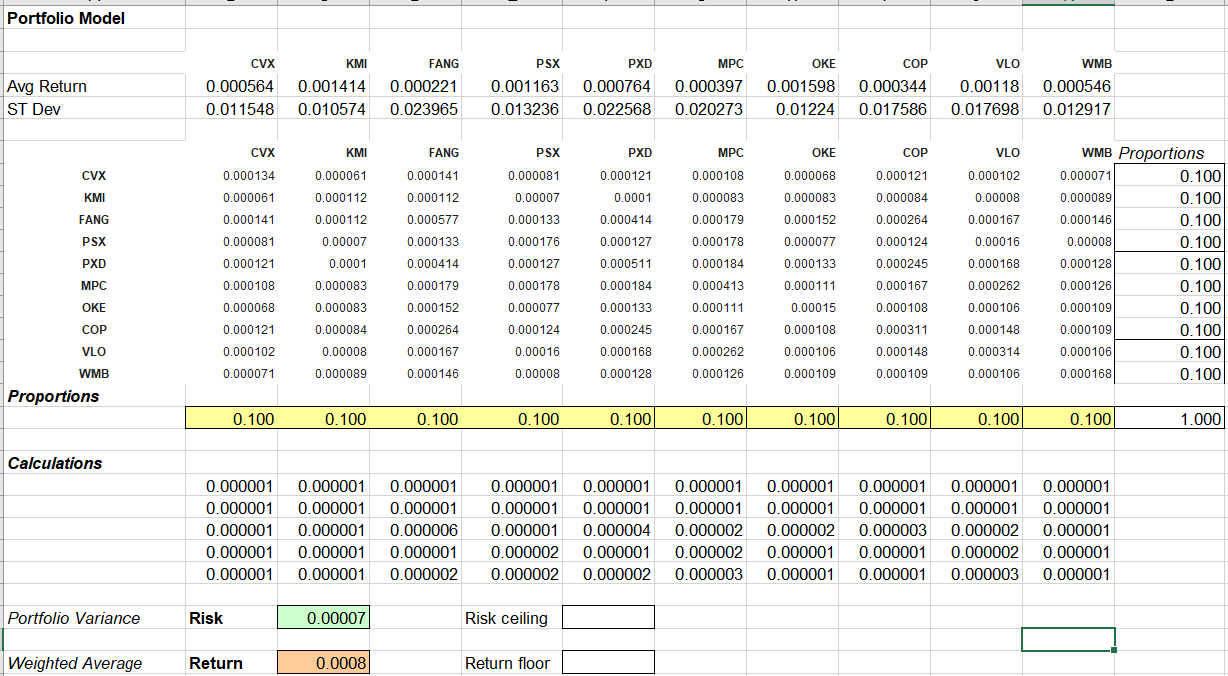

To find the risk limits we used the Excel File shared in class called 'Ms Womack from Powell (portfolio optimization).xlsx' This analyzed the covariances and starting proportions of 0.1 per stock and gave an idea of where to start in terms of risk. Above is a screenshot of the excel worksheet.

In [ ]:
# Create calculations table for calculate the risk
# Max risk should be less than 0.0.0001
max_risk = 0.0001
def calc_risk():
  # this is a list of all of your investment allocations (proportion invested in each stock)
  # this is updated as the model is running (reference decision variables)
  proportions = [ m.CVX, m.KMI, m.FANG, m.PSX, m.PXD, m.MPC, m.OKE, m.COP, m.VLO, m.WMB]
  risk_matrix = [] # an empty list
  
  # now we iterate across the covariance matrix
  # 'risk elements' are = cov(A,B)*prop(A)*prop(B)
  # since there are 10 stocks, there are 10*10 = 100 elements
  # sum these 100 elements up at the end (that's the risk)
  for index, col in enumerate(return_data_cov.columns):
    i = 0
    risk = []
    for row in return_data_cov[col]:
      risk.append(proportions[index]*row*proportions[i])
      i = i + 1
    risk_matrix.append(risk)
  risk_matrix = pd.DataFrame(risk_matrix)
  return risk_matrix.sum().sum() 

# Define risk limits. This is what psioptparam() does.

# This is a sequence of options
risk_limits = np.arange(0.00007, 0.00035, 0.0000005) # take tiny steps
risk_limits

array([7.000e-05, 7.050e-05, 7.100e-05, 7.150e-05, 7.200e-05, 7.250e-05,
       7.300e-05, 7.350e-05, 7.400e-05, 7.450e-05, 7.500e-05, 7.550e-05,
       7.600e-05, 7.650e-05, 7.700e-05, 7.750e-05, 7.800e-05, 7.850e-05,
       7.900e-05, 7.950e-05, 8.000e-05, 8.050e-05, 8.100e-05, 8.150e-05,
       8.200e-05, 8.250e-05, 8.300e-05, 8.350e-05, 8.400e-05, 8.450e-05,
       8.500e-05, 8.550e-05, 8.600e-05, 8.650e-05, 8.700e-05, 8.750e-05,
       8.800e-05, 8.850e-05, 8.900e-05, 8.950e-05, 9.000e-05, 9.050e-05,
       9.100e-05, 9.150e-05, 9.200e-05, 9.250e-05, 9.300e-05, 9.350e-05,
       9.400e-05, 9.450e-05, 9.500e-05, 9.550e-05, 9.600e-05, 9.650e-05,
       9.700e-05, 9.750e-05, 9.800e-05, 9.850e-05, 9.900e-05, 9.950e-05,
       1.000e-04, 1.005e-04, 1.010e-04, 1.015e-04, 1.020e-04, 1.025e-04,
       1.030e-04, 1.035e-04, 1.040e-04, 1.045e-04, 1.050e-04, 1.055e-04,
       1.060e-04, 1.065e-04, 1.070e-04, 1.075e-04, 1.080e-04, 1.085e-04,
       1.090e-04, 1.095e-04, 1.100e-04, 1.105e-04, 

## Results

In [ ]:
# Update the risk contraint for each limit and then solve the problem
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  m.total_risk = Constraint(expr = calc_risk() <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m).write()
  # store our allocation proportions
  param_analysis[r] = [m.CVX(), m.KMI(), m.FANG(), m.PSX(), m.PXD(), m.MPC(), m.OKE(), m.COP(), m.VLO(), m.WMB()]
  # store our returns
  returns[r] =  m.CVX()*return_data_return[0] + m.KMI()*return_data_return[1] + m.FANG()*return_data_return[2] + m.PSX()*return_data_return[3] + m.PXD()*return_data_return[4] + m.MPC()*return_data_return[5] + m.OKE()*return_data_return[6] + m.COP()*return_data_return[7] + m.VLO()*return_data_return[8] + m.WMB()*return_data_return[9]

Streaming output truncated to the last 5000 lines.
    block.del_component() and block.add_component().
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.033789873123168945
# ----------------------------------------------------------
#   Solution Information
# -------------------------------

In [ ]:
# Maximum return
ret = returns[r]
ret

0.0015978209594099857

In [ ]:
# Risk with highest return
r

0.0003494999999999992

In [ ]:
print(param_analysis)

{7e-05: [0.3088800050565577, 0.41779960656384557, 0.0, 0.11716741938172867, 0.0, 0.0, 0.1271408412692914, 0.0, 0.0, 0.02901217476801416], 7.049999999999999e-05: [0.3088799264267152, 0.41779926059373657, 1.951878061953991e-08, 0.11716724476605793, 3.5544604595843955e-08, 5.3841336962386884e-08, 0.12714060208344108, 6.490452494920961e-08, 8.585260753906074e-08, 0.029012706468193643], 7.099999999999999e-05: [0.3088799245328145, 0.4177993169440762, 1.951857159821056e-08, 0.11716724865998715, 3.5544042558255246e-08, 5.383744129346332e-08, 0.12714060623988313, 6.490291397151329e-08, 8.584955029785943e-08, 0.029012643970718423], 7.149999999999999e-05: [0.30887989375278607, 0.41779933813894743, 1.951855687164798e-08, 0.11716726011498235, 3.554397730789892e-08, 5.383709968514004e-08, 0.12714060215644465, 6.490262848080128e-08, 8.584889137858674e-08, 0.0290126461856849], 7.199999999999999e-05: [0.30887991994574615, 0.4177993479994439, 1.951859207927077e-08, 0.11716724660839585, 3.554407842956326

In [ ]:
# Stock allocations for highest return

print("objective = ", m.objective())
print("CVX = ", m.CVX())
print("KMI = ", m.KMI())
print("FANG = ", m.FANG())
print("PSX = ", m.PSX())
print("PXD = ", m.PXD())
print("MPC = ", m.MPC())
print("OKE = ", m.OKE())
print("COP = ", m.COP())
print("VLO = ", m.VLO())
print("WMB = ", m.WMB())

objective =  0.0015978209594099857
CVX =  2.5751720301968427e-06
KMI =  1.803050043772738e-05
FANG =  1.8976541815526485e-06
PSX =  6.6580961783520355e-06
PXD =  3.231400881823627e-06
MPC =  2.1929386607091587e-06
OKE =  0.9999539140149438
COP =  2.096405934022229e-06
VLO =  6.8776174625189085e-06
WMB =  2.5261992892879903e-06


### Stock Allocations Graph

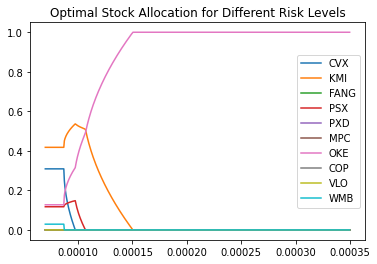

In [ ]:
# Generate the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = [ 'CVX', 'KMI', 'FANG', 'PSX', 'PXD', 'MPC', 'OKE', 'COP', 'VLO', 'WMB']
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.show()

Above is the plot showing the possible stock allocations on the y-axis vs the total return on the x-axis. We can see that some stocks like OKE and KMI have higher returns and will have larger allocations than stocks like WMB or COP. 

### Efficient Frontier Graph

In [ ]:
# Subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward) # we aren't allowed to name our value 'return' - this is a reserved name.

[7e-05, 7.049999999999999e-05, 7.099999999999999e-05, 7.149999999999999e-05, 7.199999999999999e-05, 7.249999999999999e-05, 7.299999999999999e-05, 7.349999999999998e-05, 7.399999999999998e-05, 7.449999999999998e-05, 7.499999999999998e-05, 7.549999999999998e-05, 7.599999999999998e-05, 7.649999999999998e-05, 7.699999999999997e-05, 7.749999999999997e-05, 7.799999999999997e-05, 7.849999999999997e-05, 7.899999999999997e-05, 7.949999999999997e-05, 7.999999999999997e-05, 8.049999999999996e-05, 8.099999999999996e-05, 8.149999999999996e-05, 8.199999999999996e-05, 8.249999999999996e-05, 8.299999999999996e-05, 8.349999999999996e-05, 8.399999999999995e-05, 8.449999999999995e-05, 8.499999999999995e-05, 8.549999999999995e-05, 8.599999999999995e-05, 8.649999999999995e-05, 8.699999999999995e-05, 8.749999999999994e-05, 8.799999999999994e-05, 8.849999999999994e-05, 8.899999999999994e-05, 8.949999999999994e-05, 8.999999999999994e-05, 9.049999999999994e-05, 9.099999999999994e-05, 9.149999999999993e-05, 9.1

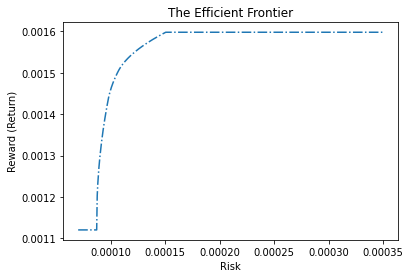

In [ ]:
# Plot Efficient Frontier using pylab
from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

The Efficient Frontier is a curved line that plots the risk vs return of a portfolio. "Every increase in risk results in a smaller amount of returns. In other words, there is a diminishing marginal return to risk, and it results in a curvature." [Coporate Finance Institute](https://corporatefinanceinstitute.com/resources/knowledge/trading-investing/efficient-frontier/)

# Analysis Section

## Data

In [ ]:
# Pull historical price data for each stocks to match with our news score later
dow_monthly_prices = {ticker : si.get_data(ticker,start_date = '01/01/2020',end_date='10/02/2020',interval='1mo') for ticker in tickers_list}
dow_monthly_prices

{'COP':                  open       high        low  ...   adjclose     volume  ticker
 2020-01-01  65.279999  67.129997  59.119999  ...  57.135448  124243600     COP
 2020-02-01  59.410000  61.150002  45.119999  ...  46.550537  157156700     COP
 2020-03-01  49.320000  51.490002  20.840000  ...  29.820412  343213100     COP
 2020-04-01  29.320000  43.580002  28.830000  ...  40.761017  243868900     COP
 2020-05-01  40.540001  45.119999  37.779999  ...  40.838474  155878200     COP
 2020-06-01  42.259998  50.790001  39.919998  ...  41.090397  166528200     COP
 2020-07-01  42.349998  42.869999  35.900002  ...  36.562824  143096500     COP
 2020-08-01  37.270000  41.830002  36.470001  ...  37.429752  128310000     COP
 2020-09-01  37.419998  37.599998  32.169998  ...  32.441097  173477200     COP
 2020-10-01  32.230000  36.000000  27.530001  ...  28.272356  250734100     COP
 
 [10 rows x 7 columns],
 'CVX':                   open        high         low  ...    adjclose     volume  tic

In [ ]:
# Extract just the data we need (adjclose)
# Get the adjclose price for the CVX (one sample)
monthly_data = pd.DataFrame(dow_monthly_prices['CVX']['adjclose']).rename(columns = {"adjclose":"CVX"})

# Combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  monthly_data[i] = pd.DataFrame(dow_monthly_prices[i]['adjclose'])
monthly_data

,CVX,KMI,FANG,PSX,PXD,MPC,OKE,COP,VLO,WMB
2020-01-01,101.394745,19.464022,71.812431,86.713402,132.306595,51.522079,67.148796,57.135448,79.192474,19.396469
2020-02-01,88.334763,18.089680,59.843693,71.044815,120.330399,44.828934,60.581779,46.550537,62.228699,17.858999
2020-03-01,69.375916,13.135542,25.288786,51.428116,68.750427,22.553648,19.803484,29.820412,43.107418,13.265346
2020-04-01,88.084251,14.371717,42.281448,70.139702,88.235069,30.631710,27.176447,40.761017,60.204029,18.624014
2020-05-01,87.797012,14.909595,41.349205,75.018913,90.497505,33.553558,34.416565,40.838474,63.330650,19.643188
2020-06-01,86.686363,14.566644,40.987244,69.797813,96.524086,36.294750,31.161581,41.090397,56.777454,18.287491
2020-07-01,81.547157,13.539201,39.066273,60.206684,96.316368,37.090942,26.180605,36.562824,54.277393,18.765965
2020-08-01,81.537437,13.518619,38.184193,56.760479,103.282715,34.430492,26.634808,37.429752,50.763794,20.364948
2020-09-01,70.955933,12.061112,29.771389,51.045990,85.454445,28.922194,25.180943,32.441097,42.557404,19.276070
2020-10-01,68.492188,11.640489,25.659536,45.945332,79.559998,29.079916,28.108059,28.272356,37.930321,19.190001


In [ ]:
# View shape
monthly_data.shape

(10, 10)

In [ ]:
monthly_return_data = pd.DataFrame()
for i in tickers_list:
  monthly_return_data[i] = monthly_data[i].pct_change()
# Drop na records
monthly_return_data.dropna(inplace=True)
monthly_return_data

,CVX,KMI,FANG,PSX,PXD,MPC,OKE,COP,VLO,WMB
2020-02-01,-0.128803,-0.070609,-0.166667,-0.180694,-0.090519,-0.129908,-0.097798,-0.185260,-0.214209,-0.079265
2020-03-01,-0.214625,-0.273865,-0.577419,-0.276117,-0.428653,-0.496895,-0.673112,-0.359397,-0.307274,-0.257218
2020-04-01,0.269666,0.094109,0.671945,0.363840,0.283411,0.358171,0.372306,0.366883,0.396605,0.403960
2020-05-01,-0.003261,0.037426,-0.022049,0.069564,0.025641,0.095386,0.266412,0.001900,0.051934,0.054724
2020-06-01,-0.012650,-0.023002,-0.008754,-0.069597,0.066594,0.081696,-0.094576,0.006169,-0.103476,-0.069016
2020-07-01,-0.059285,-0.070534,-0.046868,-0.137413,-0.002152,0.021937,-0.159843,-0.110186,-0.044033,0.026164
2020-08-01,-0.000119,-0.001520,-0.022579,-0.057240,0.072328,-0.071728,0.017349,0.023711,-0.064734,0.085207
2020-09-01,-0.129775,-0.107815,-0.220322,-0.100677,-0.172616,-0.159983,-0.054585,-0.133280,-0.161658,-0.053468
2020-10-01,-0.034722,-0.034874,-0.138114,-0.099923,-0.068978,0.005453,0.116243,-0.128502,-0.108726,-0.004465


## Model


### Risk


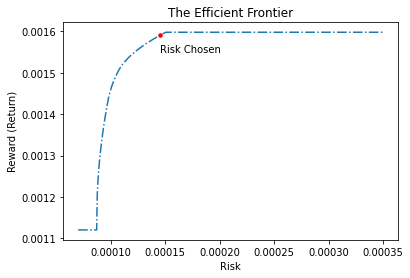

In [ ]:
# Choose risk from Efficient Frontier
from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plot(0.00014499999999999978,0.00159,'r.',ms=7)
annotate('Risk Chosen', xy=(0.00014499999999999978,0.00159), xytext=(0.00014499999999999978,0.00155))
plt.show()

$Risk\ Chosen = 0.00014499999999999978$

This risk was chosen from the Efficient Frontier made in the Modeling Section. We chose this value because while we want to increase our returns as much as possible, we still want to maintain a diverse portfolio to reduce risk to a point where we feel comfortable investing. We chose our risk as $0.0145\%$ which is where the frontier curve already has a dimishing return to increase in risk. This risk was chosen pretty close to where the return stops increasing (or increases by very little and the risk continues to grow). We chose a value where the on the curve because if we pick a point to the left our returns will be too low and if we pick on further right our risk will be too high. We want to choose a spot that will maximize returns will minimizing risk. This value will decide the stock allocation of our final portfolio.

In [ ]:
# View and search through the param_analysis dataframe
# Import module
from google.colab import data_table
data_table.DataTable(param_analysis)
# Search for specific row using filter feature, in Index: search '0.00014499999999999978'
# use .iloc[150] to extract row values from param_analysis

,CVX,KMI,FANG,PSX,PXD,MPC,OKE,COP,VLO,WMB
0.000070,0.308880,0.417800,0.000000e+00,0.117167,0.000000e+00,0.000000e+00,0.127141,0.000000e+00,0.000000e+00,0.029012
0.000070,0.308880,0.417799,1.951878e-08,0.117167,3.554460e-08,5.384134e-08,0.127141,6.490452e-08,8.585261e-08,0.029013
0.000071,0.308880,0.417799,1.951857e-08,0.117167,3.554404e-08,5.383744e-08,0.127141,6.490291e-08,8.584955e-08,0.029013
0.000071,0.308880,0.417799,1.951856e-08,0.117167,3.554398e-08,5.383710e-08,0.127141,6.490263e-08,8.584889e-08,0.029013
0.000072,0.308880,0.417799,1.951859e-08,0.117167,3.554408e-08,5.383746e-08,0.127141,6.490295e-08,8.584923e-08,0.029013
...,...,...,...,...,...,...,...,...,...,...
0.000347,0.000003,0.000018,1.897551e-06,0.000007,3.230925e-06,2.192809e-06,0.999954,2.096312e-06,6.873862e-06,0.000003
0.000348,0.000003,0.000018,1.897578e-06,0.000007,3.231047e-06,2.192842e-06,0.999954,2.096336e-06,6.874823e-06,0.000003
0.000348,0.000003,0.000018,1.897604e-06,0.000007,3.231167e-06,2.192875e-06,0.999954,2.096360e-06,6.875770e-06,0.000003
0.000349,0.000003,0.000018,1.897629e-06,0.000007,3.231285e-06,2.192907e-06,0.999954,2.096383e-06,6.876701e-06,0.000003


In [ ]:
# Locate the risk level using .iloc
# Extract stock allocations from risk level
print(param_analysis.iloc[150])

CVX     0.000003
KMI     0.041424
FANG    0.000002
PSX     0.000012
PXD     0.000003
MPC     0.000002
OKE     0.958540
COP     0.000002
VLO     0.000009
WMB     0.000003
Name: 0.00014499999999999978, dtype: float64


In [ ]:
initial_inv = pd.DataFrame()
for i in tickers_list:
  initial_inv[150] =  param_analysis.iloc[150] * 1000000
first_inv = initial_inv.T.rename(index={150:'2020-01-01'})
first_inv

,CVX,KMI,FANG,PSX,PXD,MPC,OKE,COP,VLO,WMB
2020-01-01,3.156381,41423.913746,1.799798,11.863701,3.166003,2.294268,958540.349312,2.203841,8.590545,2.662405


In [ ]:
# Convert each stock column to a list
CVX_return = monthly_return_data["CVX"].tolist()
KMI_return = monthly_return_data["KMI"].tolist()
FANG_return = monthly_return_data["FANG"].tolist()
PSX_return = monthly_return_data["PSX"].tolist()
PXD_return = monthly_return_data["PXD"].tolist()
MPC_return = monthly_return_data["MPC"].tolist()
OKE_return = monthly_return_data["OKE"].tolist()
COP_return = monthly_return_data["COP"].tolist()
VLO_return = monthly_return_data["VLO"].tolist()
WMB_return = monthly_return_data["WMB"].tolist()

### Calculate Monthly Stock and Portfolio Value
$Monthly\ Stock\ Value = Stock\ Value\ of\ Previous\ Month\ +\ (Stock\ Value\ of\ Previous\ Month\ *\ Percent\ Change\ in\ Return\ this\ Month)$ 
*   $Stock\ Value\ of\ Previous\ Month\:$ For first month is found from param_analysis, the stock allocation for the risk value chosen from our modeling section
* Each month after is calculated using formula above
*   $Percent\ Change\ in\ Return\ this\ Month:$ Comes from historical data extracted from Yahoo Finance



In [ ]:
# Write functions that multiply the current value by pct change in return
# Start list with initial investment amount begin_inv[]
# (Stock value of past month) + (Return of this month * Stock value of past month)
# Adds each month to the stockname_list[] (repeat for all 10 stocks)

CVX_list = [first_inv['CVX'][0]]
for i in range(0, len(CVX_return)): 
    CVX_list.append(CVX_list[i] + (CVX_return[i] * CVX_list[i])) 
print ("Value of CVX is: " + str(CVX_list)) 

KMI_list = [first_inv['KMI'][0]]
for i in range(0, len(KMI_return)): 
    KMI_list.append(KMI_list[i] + (KMI_return[i] * KMI_list[i])) 
print ("Value of KMI is: " + str(KMI_list)) 

FANG_list = [first_inv['FANG'][0]]
for i in range(0, len(FANG_return)): 
    FANG_list.append(FANG_list[i] + (FANG_return[i] * FANG_list[i])) 
print ("Value of FANG is: " + str(FANG_list)) 

PSX_list = [first_inv['PSX'][0]]
for i in range(0, len(PSX_return)): 
    PSX_list.append(PSX_list[i] + (PSX_return[i] * PSX_list[i])) 
print ("Value of PSX is: " + str(PSX_list)) 

PXD_list = [first_inv['PXD'][0]]
for i in range(0, len(PXD_return)): 
    PXD_list.append(PXD_list[i] + (PXD_return[i] * PXD_list[i])) 
print ("Value of PXD is: " + str(PXD_list)) 

MPC_list = [first_inv['MPC'][0]]
for i in range(0, len(MPC_return)): 
    MPC_list.append(MPC_list[i] + (MPC_return[i] * MPC_list[i])) 
print ("Value of MPC is: " + str(MPC_list)) 

OKE_list = [first_inv['OKE'][0]]
for i in range(0, len(OKE_return)): 
    OKE_list.append(OKE_list[i] + (OKE_return[i] * OKE_list[i])) 
print ("Value of OKE is: " + str(OKE_list)) 

COP_list = [first_inv['COP'][0]]
for i in range(0, len(COP_return)): 
    COP_list.append(COP_list[i] + (COP_return[i] * COP_list[i])) 
print ("Value of COP is: " + str(COP_list)) 

VLO_list = [first_inv['VLO'][0]]
for i in range(0, len(VLO_return)): 
    VLO_list.append(VLO_list[i] + ((VLO_return[i]) * VLO_list[i])) 
print ("Value of VLO is: " + str(VLO_list)) 

WMB_list = [first_inv['WMB'][0]]
for i in range(0, len(WMB_return)): 
    WMB_list.append(WMB_list[i] + (WMB_return[i] * WMB_list[i])) 
print ("Value of WMB is: " + str(WMB_list))

# Add values from each stock across each month to get total monthly porfolio value
total_value = []
for i in range(0, len(CVX_list)):
  total_value.append(CVX_list[i] + KMI_list[i] + FANG_list[i] + PSX_list[i] + PXD_list[i] + MPC_list[i] + OKE_list[i] + COP_list[i] + VLO_list[i] + WMB_list[i])
print ("Total value of monthly portfolio is: " + str(total_value))

Value of CVX is: [3.156380739187223, 2.7498283420502445, 2.1596464768283745, 2.7420300224120666, 2.733088376727348, 2.6985142825800152, 2.5385327111411824, 2.5382301358642207, 2.2088318218500884, 2.132136351647033]
Value of KMI is: [41423.91374593928, 38498.99802543627, 27955.453615872022, 30586.31940808749, 31731.04755075749, 31001.167315239247, 28814.532502911345, 28770.72885051207, 25668.820557317642, 24773.63643570642]
Value of FANG is: [1.7997983325943543, 1.4998319438286287, 0.6337999412044388, 1.059678371147152, 1.0363140317061499, 1.0272423786703333, 0.9790980645365392, 0.9569909415175698, 0.746145135297615, 0.6430918700300929]
Value of PSX is: [11.86370128364455, 9.720002285955319, 7.036141949648078, 9.596169145399232, 10.263718862713286, 9.549393651703447, 8.237182497848664, 7.765689654907502, 6.9838613690614695, 6.286014363247304]
Value of PXD is: [3.166003076958357, 2.8794211847646363, 1.6451490150763537, 2.111402694170851, 2.1655411826599997, 2.309752991690068, 2.304782449

## Results

In [ ]:
# Convert lists to a dataframe to store all values
final_value = pd.DataFrame(
    {'CVX': CVX_list,
     'KMI': KMI_list,
     'FANG': FANG_list,
     'PSX': PSX_list,
     'PXD': PXD_list,
     'MPC': MPC_list,
     'OKE': OKE_list,
     'COP': COP_list,
     'VLO': VLO_list,
     'WMB': WMB_list,
     'Total Value': total_value
    })

# Change index to dates
final_value_df = final_value.rename(index={0:'2020-01-01', 1:'2020-02-01', 2:'2020-03-01', 3:'2020-04-01', 4:'2020-05-01', 5:'2020-06-01', 6:'2020-07-01', 7:'2020-08-01', 8:'2020-09-01', 9:'2020-10-01'})
# Final dataframe with the value of each stock by month and the total portfolio value by month
final_value_df

,CVX,KMI,FANG,PSX,PXD,MPC,OKE,COP,VLO,WMB,Total Value
2020-01-01,3.156381,41423.913746,1.799798,11.863701,3.166003,2.294268,958540.349312,2.203841,8.590545,2.662405,1000000.000000
2020-02-01,2.749828,38498.998025,1.499832,9.720002,2.879421,1.996223,864797.039610,1.795557,6.750369,2.451368,903325.880237
2020-03-01,2.159646,27955.453616,0.633800,7.036142,1.645149,1.004309,282692.163423,1.150239,4.676154,1.820832,310667.743311
2020-04-01,2.742030,30586.319408,1.059678,9.596169,2.111403,1.364024,387940.252674,1.572243,6.530739,2.556376,418554.104745
2020-05-01,2.733088,31731.047551,1.036314,10.263719,2.165541,1.494133,491291.997864,1.575230,6.869905,2.696270,523051.879616
2020-06-01,2.698514,31001.167315,1.027242,9.549394,2.309753,1.616198,444827.525104,1.584948,6.159036,2.510184,475856.147687
2020-07-01,2.538533,28814.532503,0.979098,8.237182,2.304782,1.651652,373724.737653,1.410309,5.887837,2.575860,402564.855411
2020-08-01,2.538230,28770.728851,0.956991,7.765690,2.471482,1.533183,380208.421563,1.443748,5.506693,2.795341,409004.161771
2020-09-01,2.208832,25668.820557,0.746145,6.983861,2.044864,1.287899,359454.686642,1.251325,4.616490,2.645879,385145.292495
2020-10-01,2.132136,24773.636436,0.643092,6.286014,1.903814,1.294923,401238.893278,1.090527,4.114559,2.634064,426032.628845


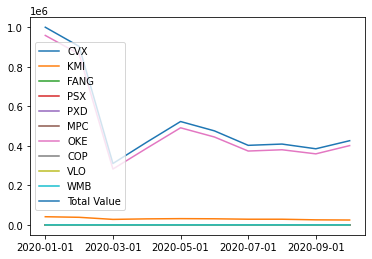

In [ ]:
# Plot all stock values and portfolio value by month on one graph
# Not helpful to look at because of the large difference in ranges. 
# Better visualizations below.
final_value_df.plot()

While the graph above is not helpful in showing the changes for most of the stocks because the range of the final values are so different for each stock and overall portfolio, it is interesting to see how the final portfolio value follows the change in value of OKE. This stock as we saw in the Stock Allocations Graph, is the one that provides the greatest return in out portfolio. It also poses the most risk since we invested 95% of our initial $1000000 investment there.

### Visualize Results

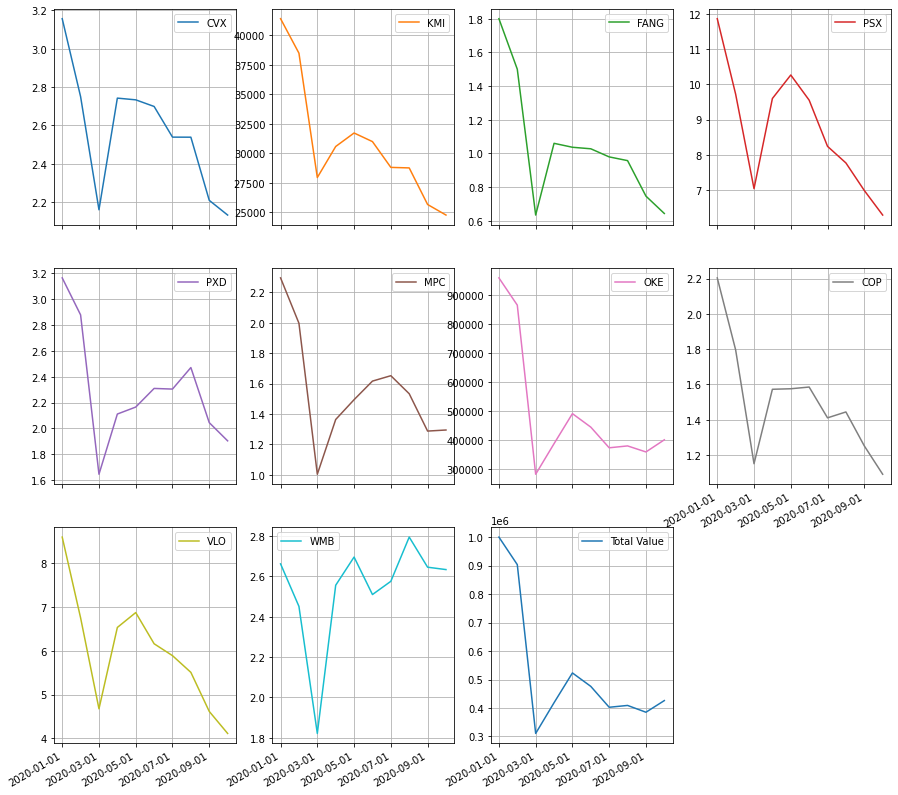

In [ ]:
# Plot each stock value and portfolio value by month on separate graphs 
final_value_df.plot(subplots=True,
        grid=True, 
        layout=(3,4),
         figsize=(15,15))
plt.show()

### Portfolio Value Graph

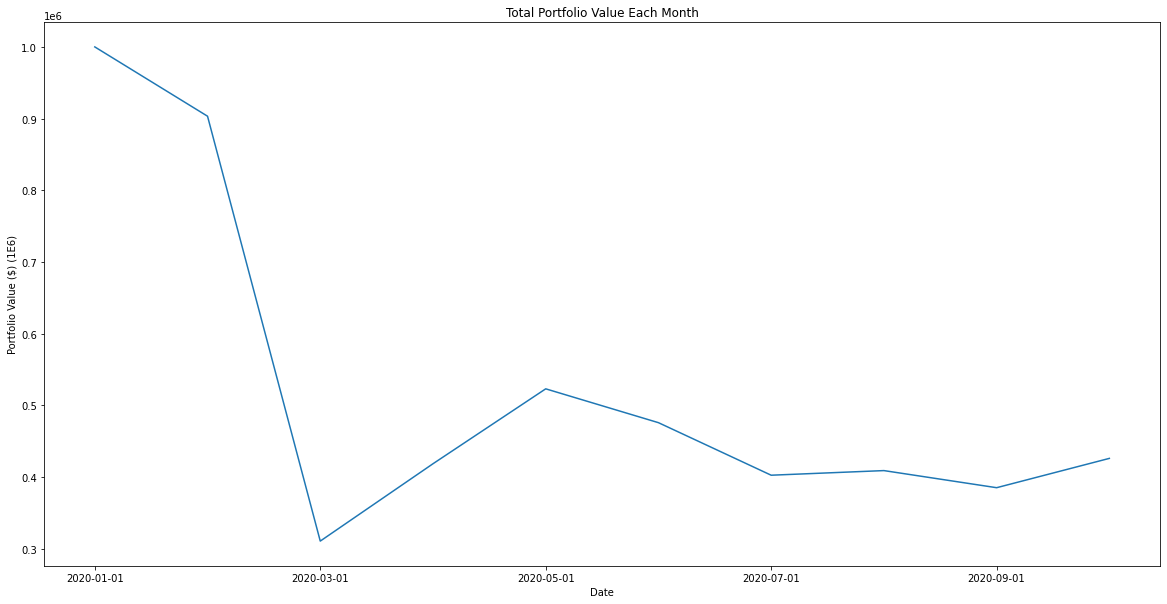

In [ ]:
# Plot the Value of Portfolio by month in 2020 alone
final_value_df['Total Value'].plot(figsize=(20,10))
plt.title('Total Portfolio Value Each Month')
xlabel('Date')
ylabel('Portfolio Value ($) (1E6)')
plt.show()

## Written Analysis

In the end we ended up making having an increase in returns at the beginning of October in 2020 with our chosen stock allocation. Our final portfolio value was of $\$426,032$ that is a $57.4\%$ decrease from our initial investment. I would attribute this outcome to luck and taking a chance on a riskier stock allocation. The year 2020 was very difficult year to predict for the stock market because of the COVID-19 outbreak and resulting pandemic. We can see how volatile it was simply through the change in stock price values and the change in portfolio value month-by-month. This can clearly be seen in the drop in stock prices and portfolio value from February to March, which is when the pandemic really hit the US and the country started going into lockdown. While we did have solid reasoning behind the risk and allocation we chose, it was very difficult to make the right decision with an unpredictable year like this one. 

Another challenge was that to create the Stock Allocations Graph and the Efficient Frontier Graph the historical data we used was only 2019 daily data. Ideally, we would want to create these visualizations and models using many years worth of data. Our risk was pretty high since $95\%$ of our initial investment was allocated to one stock, OKE. This made our whole portfolio highly dependent on it's stock price. Due to taking this risk we we suffered a major loss whenever OKE did. WMB was the stock that recovered the quickest from the drop in March but according to our portfolio allocation and the risk chosen in our Efficent Frontier, based on historical data we only invested about $\$2.66$. In real-world practice, I would probably choose a lower risk and more diverse portfolio to avoid the major changes in the value of my portfolio. 

# Conclusion



Based on the analysis: 
*   Diversification is the most critical component of reaching long-range investment goals while minimizing risk.
*   Diversification in different stocks and various sectors is necessary to reduce the risk in the market
*   Diversification may lead to lower rewards because the risk is mitigated, and vice versa
*   The energy sector didn't perform well in 2020, and COVID is one of the reasons.
* Low-risk business model provide financial flexibility to continue expanding its pipeline network.
*   When investing, we should balance the stocks we have and the sectors we choose. Don't put all your eggs in one basket.
*   When creating a portfolio analysis extract historical data further back than 1 year. Having more data to analyze will improve our model's ability to choose better allocations and predict a larger return on investment.
* Investors should focus on the stocks of companies that can easily survive a downturn, since that also puts them in the best position to thrive when market conditions improve.
*   Take small steps in the risk limits to better plot the Efficient Frontier and choose risk level. This way we can see a more defined curve and see how return changes as we increase risk. Will help in choosing the right stock allocation.







# Team Contribution

*   Silvanna Moran-Vargas: 
  * Contribution: Modeling and Analysis Sections code and written explanations, conclusion.
  * Effort: 100%, attended each meeting and came prepared. Regularly updated team with results and tried to make progress ahead of time.
*   Manasa Chinmayi Karra: 
  * Contribution: Exploratory Data Analysis code and written explanations, Introduction, Modeling code.
  * Effort: 100%, always prepared and responded timely with all my results
*   Ying Liu: 
  * Contribution: Initial Exploratory Data Analysis with explanations, stock selection, modeling and conclusion.
  * Effort: 100%, always attended each meeting on time and had timely responded.
*   Janani Sridhar: 
  * Contribution: Modeling, conclusion and project presentation
  * Effort: 100%, attended team meetings, updating team with results.
